# Flight Price Prediction

In this notebook, we will consider the problem of modelling flight price predicition based on the data from Kaggle website.

## Import Necessary Libraries

First, we need to import the libraries that will be used throughout this notebook.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


## Load Datasets

Now, let's load the datasets that we will be using for our analysis.


In [35]:
# Load datasets
business_df = pd.read_csv('../datasets/business.csv')
economy_df = pd.read_csv('../datasets/economy.csv')
clean_dataset = pd.read_csv('../datasets/Clean_Dataset.csv')
business_df.head()
economy_df.head()
clean_dataset.head()

Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955

In [36]:
clean_dataset.shape
clean_dataset.describe(include='all')

Unnamed: 0  airline  flight source_city departure_time   stops  \
count   300153.000000   300153  300153      300153         300153  300153   
unique            NaN        6    1561           6              6       3   
top               NaN  Vistara  UK-706       Delhi        Morning     one   
freq              NaN   127859    3235       61343          71146  250863   
mean    150076.000000      NaN     NaN         NaN            NaN     NaN   
std      86646.852011      NaN     NaN         NaN            NaN     NaN   
min          0.000000      NaN     NaN         NaN            NaN     NaN   
25%      75038.000000      NaN     NaN         NaN            NaN     NaN   
50%     150076.000000      NaN     NaN         NaN            NaN     NaN   
75%     225114.000000      NaN     NaN         NaN            NaN     NaN   
max     300152.000000      NaN     NaN         NaN            NaN     NaN   

       arrival_time destination_city    class       duration      days_left  \
count        300153           300153   300153  300153.000000  300153.000000   
unique            6                6        2            NaN            NaN   
top           Night           Mumbai  Economy            NaN            NaN   
freq          91538            59097   206666            NaN            NaN   
mean            NaN              NaN      NaN      12.221021      26.004751   
std             NaN              NaN      NaN       7.191997      13.561004   
min             NaN              NaN      NaN       0.830000       1.000000   
25%             NaN              NaN      NaN       6.830000      15.000000   
50%             NaN              NaN      NaN      11.250000      26.000000   
75%             NaN              NaN      NaN      16.170000      38.000000   
max             NaN              NaN      NaN      49.830000      49.000000   

                price  
count   300153.000000  
unique            NaN  
top               NaN  
freq              NaN  
mean     20889.660523  
std      22697.767366  
min       1105.000000  
25%       4783.000000  
50%       7425.000000  
75%      42521.000000  
max     123071.000000

In [37]:
clean_dataset.dropna(inplace=True)
clean_dataset.shape

(300153, 12)

In [38]:
clean_dataset.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


# Let's visualize the first few rows of the dataset

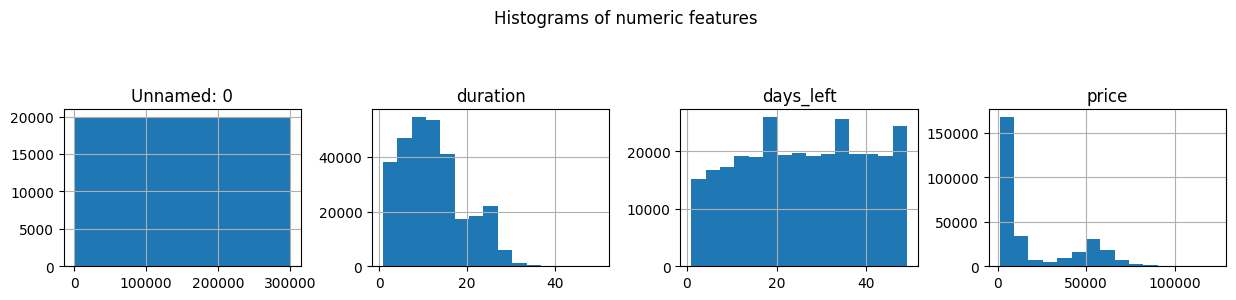

In [43]:
# Plotting histograms for all numeric features to understand distributions
clean_dataset.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of numeric features')
plt.show()

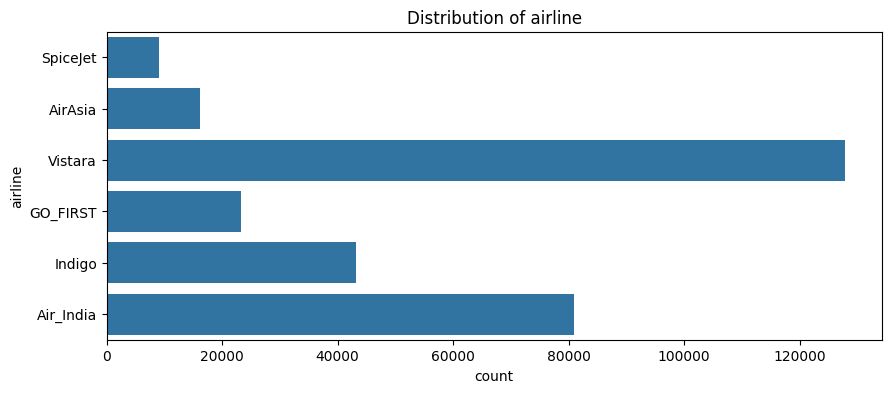

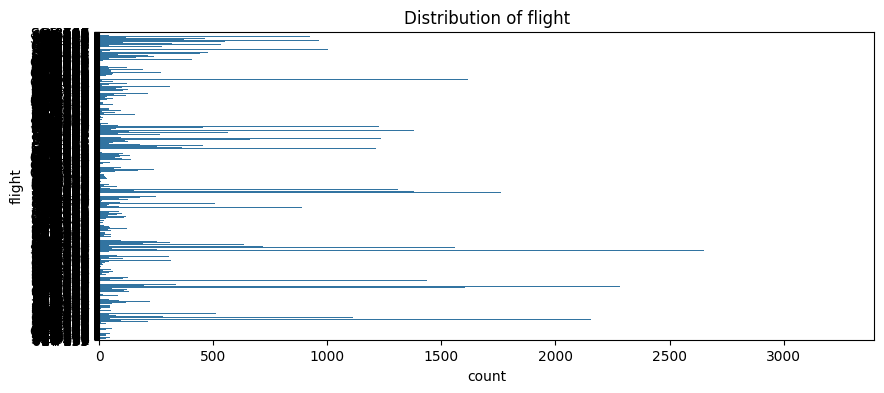

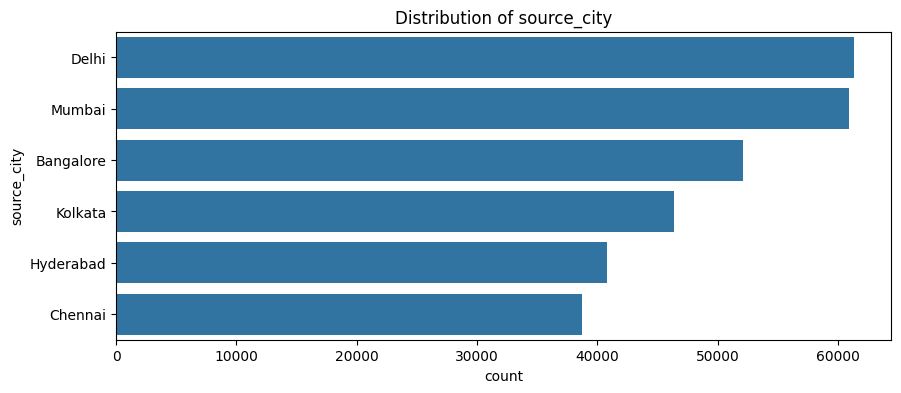

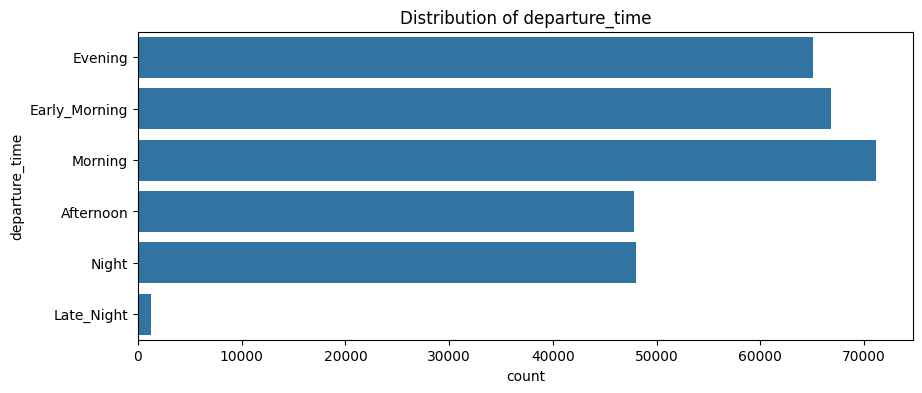

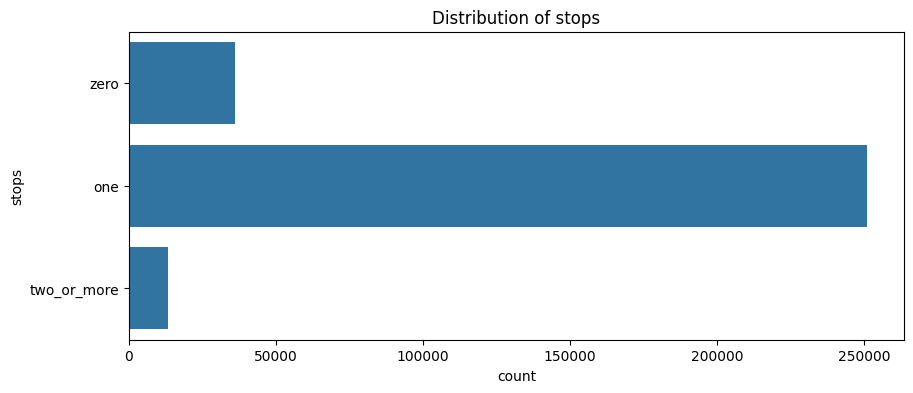

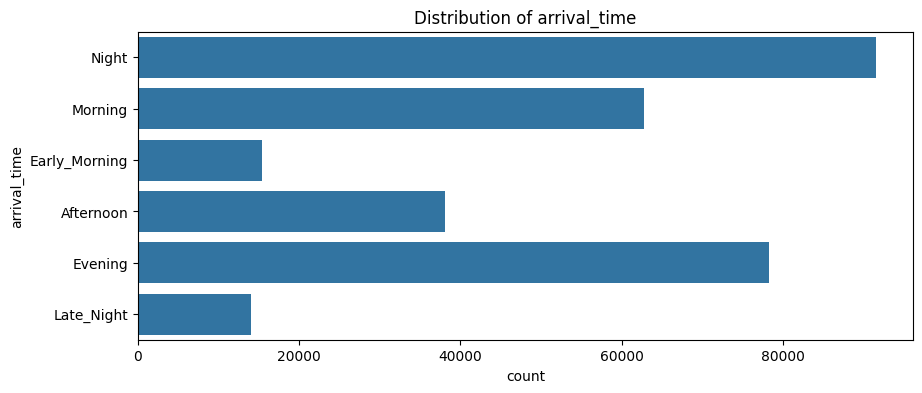

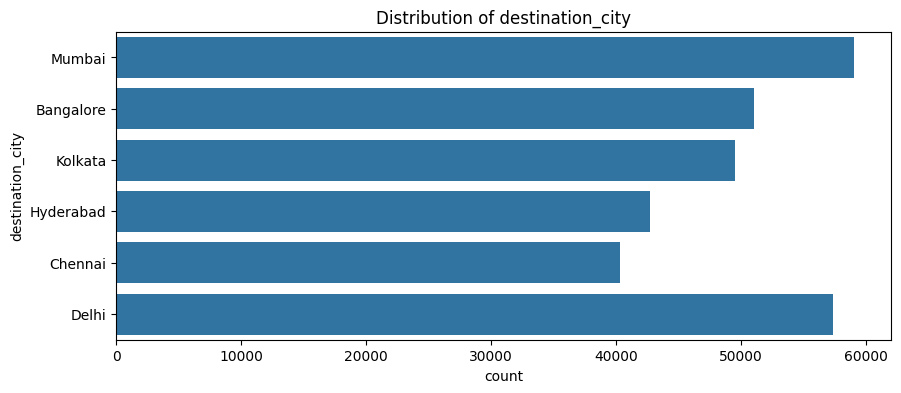

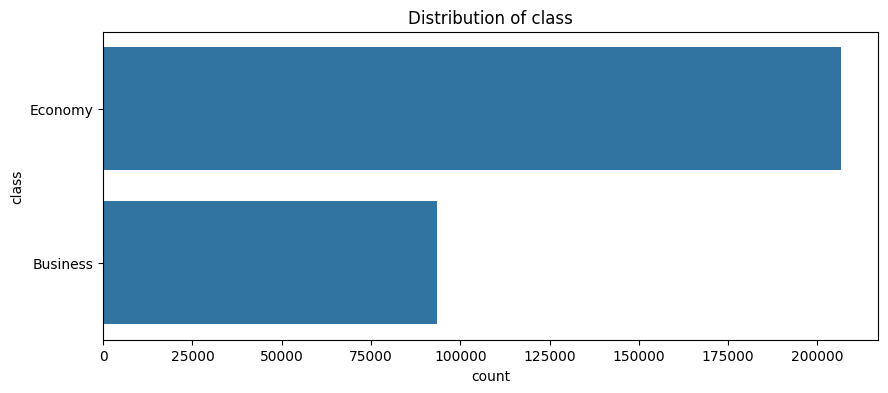

In [51]:
# For categorical data, we can use count plots to understand the distribution of categories
for column in clean_dataset.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=column, data=clean_dataset)
    plt.title(f'Distribution of {column}')
    plt.show()

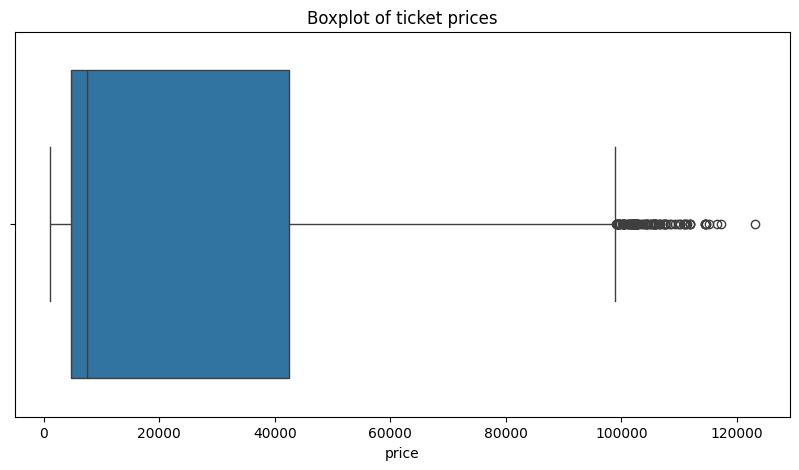

In [52]:
# Boxplot for the price column to see its distribution and spot any outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=clean_dataset['price'])
plt.title('Boxplot of ticket prices')
plt.show()

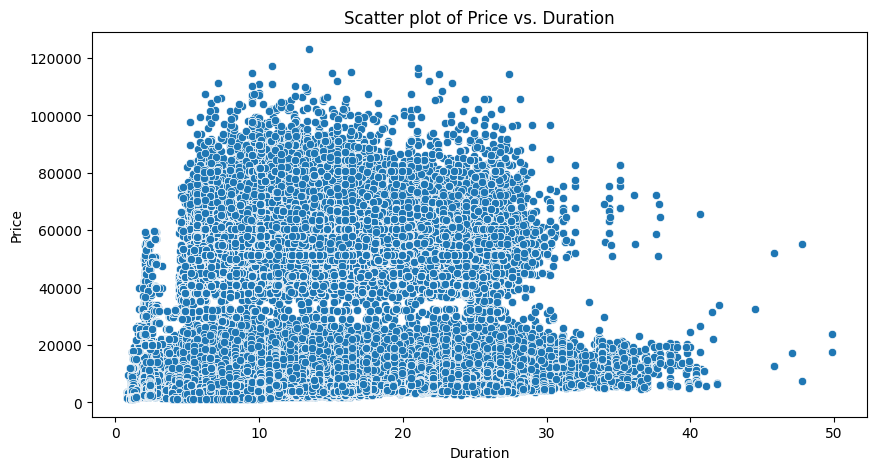

In [53]:
# A scatter plot to visualize the relationship between two variables, for example, price and duration
plt.figure(figsize=(10, 5))
sns.scatterplot(x=clean_dataset['duration'], y=clean_dataset['price'])
plt.title('Scatter plot of Price vs. Duration')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()



In [54]:
# Correlation heatmap to understand the relationships between variables
# Select only the numeric columns for correlation
numeric_dataset = clean_dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_dataset.corr()

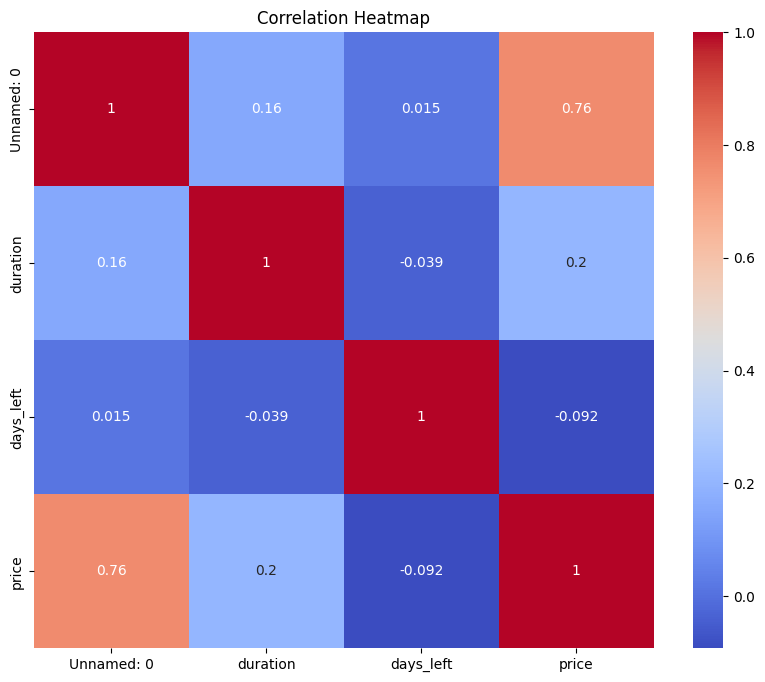

In [55]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='price'>

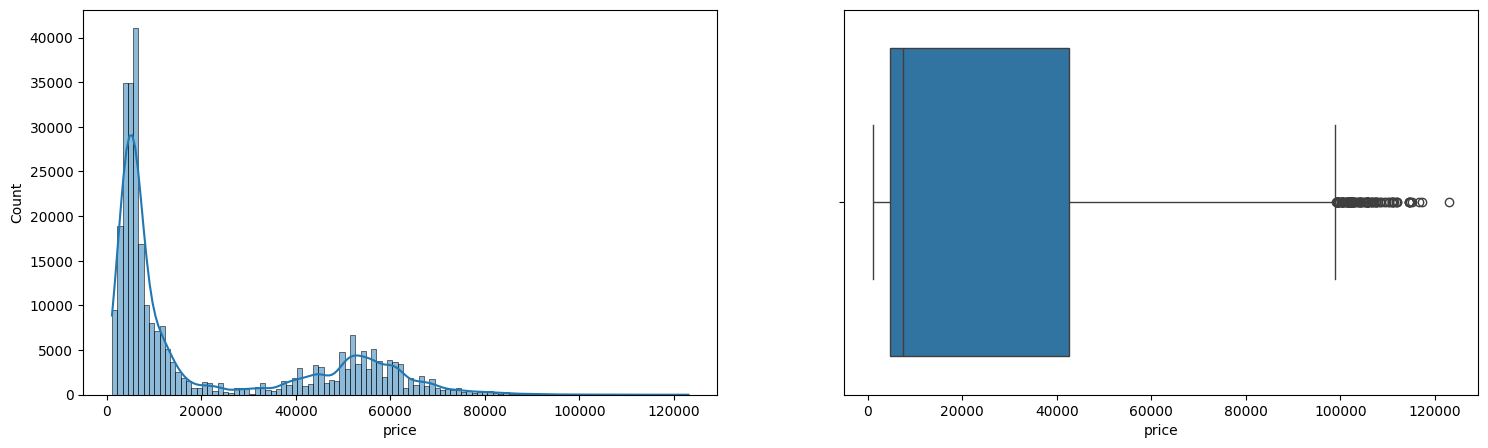

In [56]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.histplot(x = 'price', data = clean_dataset, kde = True)
plt.subplot(1,2,2)
sns.boxplot(x = 'price', data = clean_dataset)